microToolsTest
Basic demo of the microTools module showing how to import some data, make plots, etc.

Ira Thorpe
2018-06-04

In [1]:
#%matplotlib notebook
#%matplotlib inline
# import
#%matplotlib qt 
import numpy as np
import os
import pathlib
import healpy as hp
import pickle
import matplotlib
import matplotlib.mlab as ml
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import microTools
import datetime
import colormap
import pandas as pd

import skymapTools

from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy import units as u
import ligo.skymap.plot

# This IPython magic generates a table with version information
#https://github.com/jrjohansson/version_information
%load_ext version_information
%version_information numpy, matplotlib, healpy, pandas, pickle

Software versions
Python 3.6.0 64bit [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
IPython 6.4.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.3
matplotlib 2.2.2
healpy 1.11.0
pandas 0.23.0
pickle The 'pickle' distribution was not found and is required by the application
Mon Jun 11 15:16:44 2018 EDT

In [2]:
# pick a segment time and load the data 
segment = 1147740231

# setup directory structure
p = pathlib.PurePath(os.getcwd())
baseDir = str(p.parent)

# load GRS1
chainFile = baseDir + '/data/' + str(segment) + '_grs1.pickle'
fid = open(chainFile,'rb')
data1 = pickle.load(fid)
fid.close()

# load GRS2
chainFile = baseDir + '/data/' + str(segment) +'_grs2.pickle'
if os.path.exists(chainFile) :
    fid = open(chainFile,'rb')
    data2 = pickle.load(fid)
    fid.close()

# make plot directory
plotDir = baseDir + '/plots/' + str(segment)
if not os.path.exists(plotDir):
    os.makedirs(plotDir)

/Users/shouriha/anaconda2/envs/skymaps/lib/python3.6/site-packages/quaternion/numba_wrapper.py:29: UserWarning: 

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Could not import from either numbapro or numba.
This means that the code will run MUCH more slowly.
You probably REALLY want to install numba / numbapro.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

  warnings.warn(warning_text)


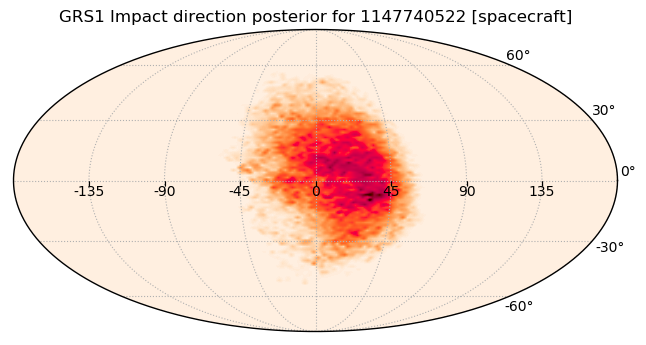

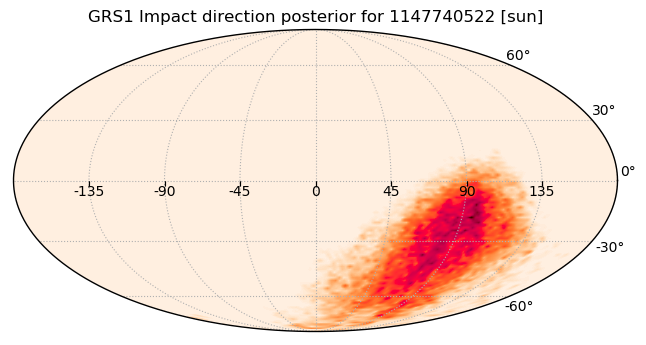

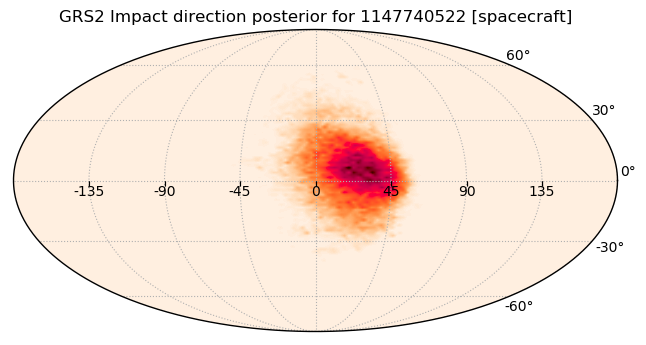

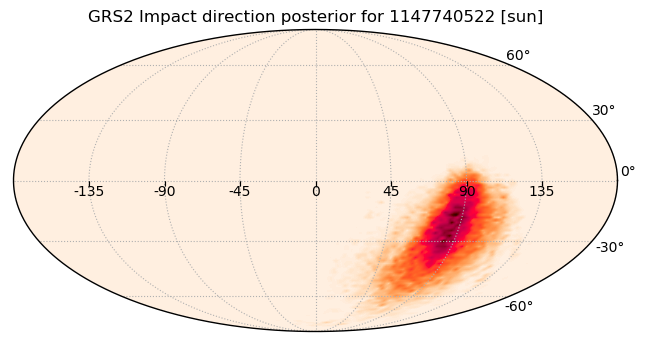

In [3]:
# compute sunward sky angles
data1 = microTools.SCtoSun(data1)
data2 = microTools.SCtoSun(data2)

fig = skymapTools.makeMollweide(data1, sun = False, GRS_num = '1')
fig.savefig(plotDir + '/sky_SC1.png', format = 'png')

fig = skymapTools.makeMollweide(data1, sun = True, GRS_num = '1')
fig.savefig(plotDir + '/sun_SC1.png', format = 'png')


skymapTools.makeMollweide(data2, sun = False, GRS_num = '2')
fig.savefig(plotDir + '/sky_SC2.png', format = 'png')

skymapTools.makeMollweide(data2, sun = True, GRS_num = '2')
fig.savefig(plotDir + '/sun_SC2.png',format = 'png')


In [4]:
"""
nside = 32
healpix = hp.pixelfunc.ang2pix(nside, dataHTC["lon"] * np.pi / 180,
                               dataHTC["lat"] * np.pi / 180, nest = False, lonlat= True)
fig = plt.figure(figsize=(8, 4), dpi=100)
ax = plt.axes(
        projection = 'geo degrees mollweide')
print(12 * nside**2)
print(len(data1["lat"]))
print(len(dataHTC["lat"]))

ax.imshow_hpx(healpix, cmap='cylon')
       """

'\nnside = 32\nhealpix = hp.pixelfunc.ang2pix(nside, dataHTC["lon"] * np.pi / 180,\n                               dataHTC["lat"] * np.pi / 180, nest = False, lonlat= True)\nfig = plt.figure(figsize=(8, 4), dpi=100)\nax = plt.axes(\n        projection = \'geo degrees mollweide\')\nprint(12 * nside**2)\nprint(len(data1["lat"]))\nprint(len(dataHTC["lat"]))\n\nax.imshow_hpx(healpix, cmap=\'cylon\')\n       '

In [5]:
# Read in model data 

# Halley type
dataHTC = skymapTools.readSkymapData(baseDir + "/data", 
                                  dataFile = "HTC_30um")
## jupiter family
dataJFC = skymapTools.readSkymapData(baseDir + "/data", 
                                  dataFile = "JFC_30um")

/Users/shouriha/anaconda2/envs/skymaps/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/shouriha/anaconda2/envs/skymaps/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


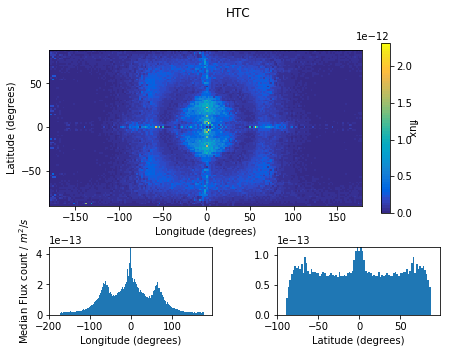

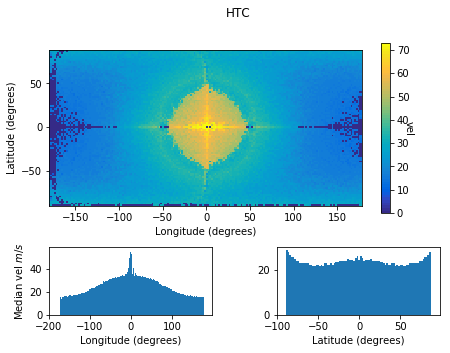

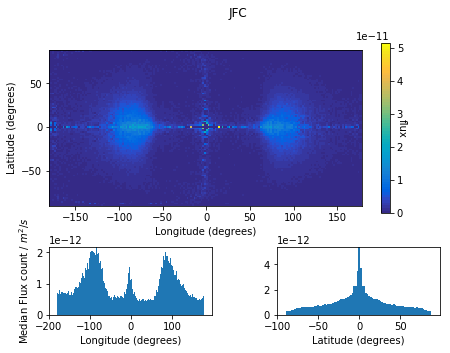

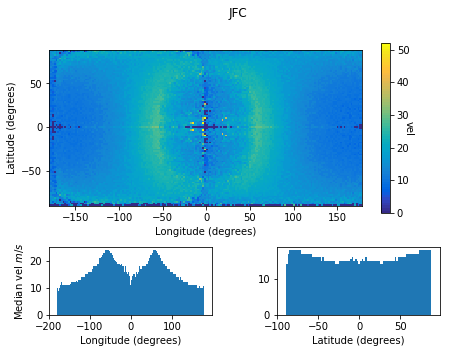

In [6]:
# Halley Type
skymapTools.makePlots(dataHTC, y_var = "flux", comet = "HTC", step = 2)
skymapTools.makePlots(dataHTC, y_var = "vel", comet = "HTC", step = 2)

## jupiter family
skymapTools.makePlots(dataJFC, y_var = "flux", comet = "JFC", step = 2)
skymapTools.makePlots(dataJFC, y_var = "vel", comet = "JFC", step = 2)


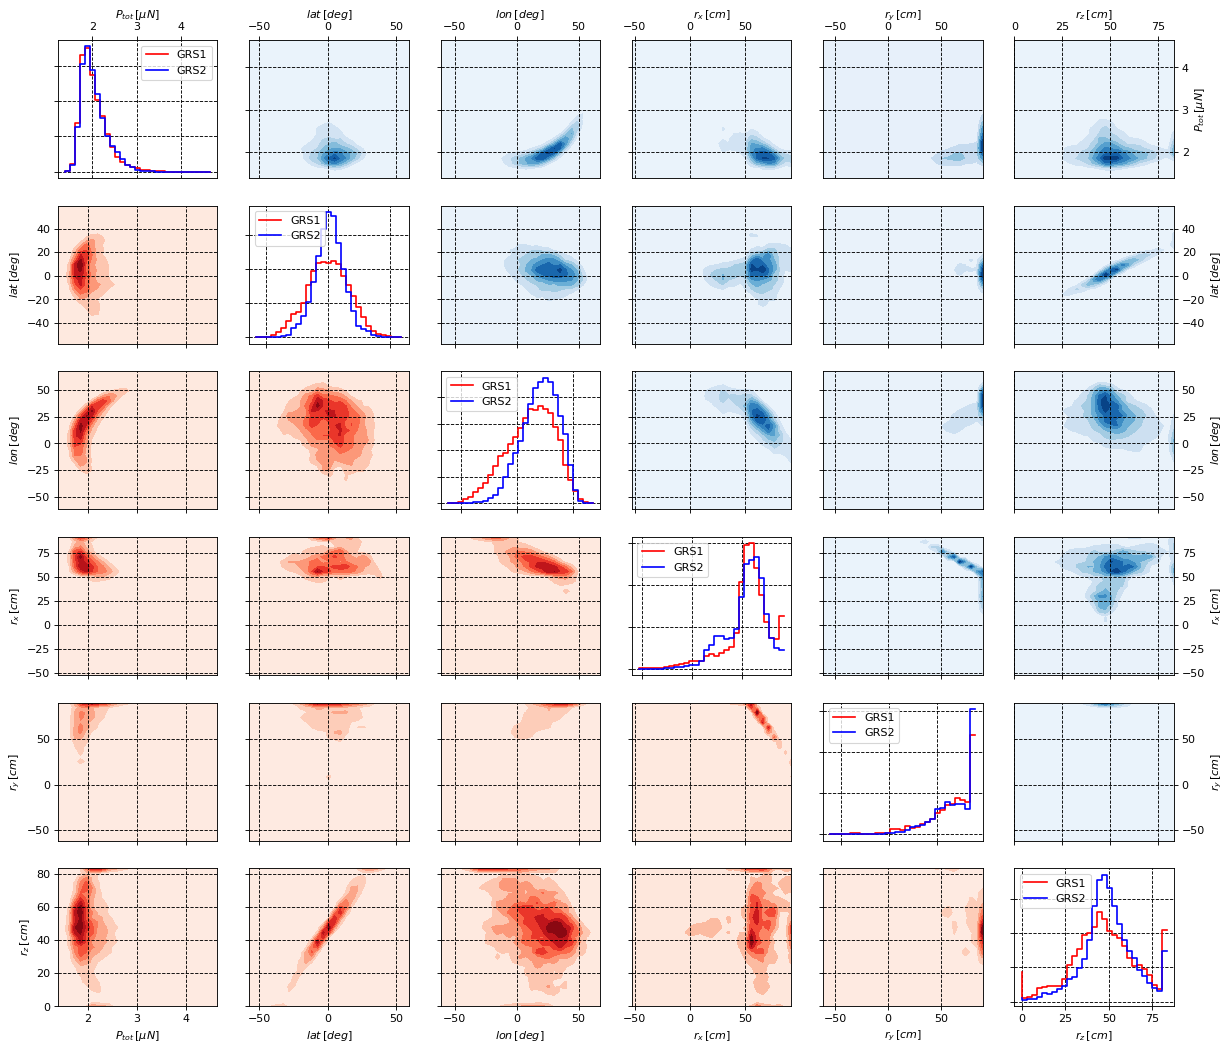

In [7]:
# produce and save the dual corner plot
hf = microTools.dualCorner(data1,data2)
hf.savefig(plotDir+'/dualCorner.png',format='png')

GRS 1
GRS 2


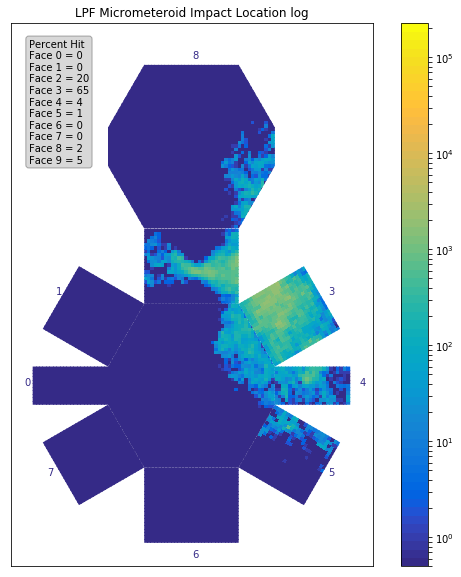

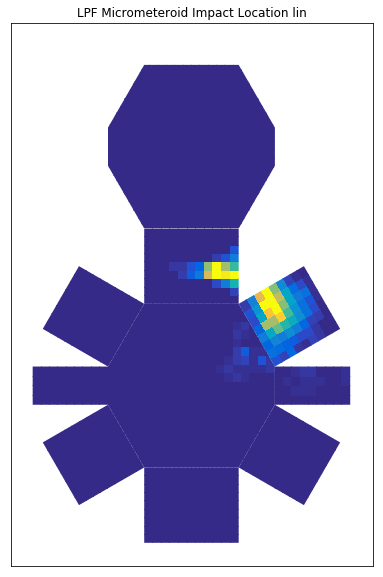

In [8]:
# Flattened LPF
print("GRS 1")
fig1 = microTools.flatten_LPF(data1, scale = 'log', legend = True)
fig1.savefig(plotDir + '/flat_LPF_log_GRS1.png', format='png')

print("GRS 2")
fig2 = microTools.flatten_LPF(data2, scale = 'lin', legend = False, N = 20, 
                              add_face_nums = False, colorbar = False)
fig2.savefig(plotDir + '/flat_LPF_lin_GRS2.png',format='png')

In [ ]:
# 3D LPF 
N = 50
microTools.make3DLPF(data1, N = N, scale = 'lin', cmap = colormap.parula)
fig3d = microTools.make3DLPF(data2, N = N, scale = 'log', cmap = colormap.parula)

/Users/shouriha/anaconda2/envs/skymaps/lib/python3.6/site-packages/matplotlib/colors.py:486: UserWarning: Warning: converting a masked element to nan.
  xa = np.array([X])


In [11]:
# Attempt at pickl(e)?ing 3D plot 

pickle.dump(fig3d, open('FigureObject.pickle', 'wb'))
output = open('FigureObject.pickle', 'wb')
pickle.dump(fig3d, output)
output.close()
figx = pickle.load(open('FigureObject.pickle', 'rb'))
figx.show()

NameError: name 'fig3d' is not defined